In [2]:
import time
start_time = time.time()
import progressbar
import os
import numpy as np
from keras.preprocessing import image
import cv2
import dlib
import pandas as pd
import matplotlib.pyplot as plt
import sys

Using TensorFlow backend.


In [3]:
from keras.preprocessing import image
from sklearn import svm, datasets
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt

In [4]:
cwd = os.getcwd()

print(cwd)

C:\Users\User\Desktop\4th_year_AMLS\zceecyt-AMLSassignment19_20-16053203\Project-16053203\Notebook\A2


In [4]:
import landmarks_v2 as l2

In [5]:
def get_data():
    return l2.extract_features_labels()
    
def split_data(X, Y):

    X, Y = shuffle(X,Y)
    tr_X, te_X, tr_Y, te_Y = train_test_split(X, Y, train_size=0.7)
    
    return tr_X, tr_Y, te_X, te_Y

In [6]:
X,y = get_data()

print(X.shape)
print(y.shape)

(4798, 68, 2)
(4798,)


In [7]:
print (os.path.abspath(os.curdir))
# sklearn functions implementation
def img_SVM(training_images, training_labels, test_images, test_labels):
    #classifier = ...
    classifier = SVC(kernel = 'rbf')
    classifier.fit(training_images, training_labels)
    pred = classifier.predict(test_images)
    print("Accuracy:", accuracy_score(test_labels, pred))

    print(pred)
    return pred

C:\Users\User\Desktop\4th_year_AMLS\zceecyt-AMLSassignment19_20-16053203\notebook\A2


In [8]:
Y = np.array([y, -(y - 1)]).T

tr_X, tr_Y, te_X, te_Y = split_data(X, Y)

In [9]:
print(tr_X)
print(tr_X.shape)
print(tr_Y)
print(tr_Y.shape)

[[[ 33 108]
  [ 33 121]
  [ 34 135]
  ...
  [ 99 155]
  [ 95 156]
  [ 90 156]]

 [[ 49 113]
  [ 50 124]
  [ 52 135]
  ...
  [ 92 156]
  [ 88 156]
  [ 84 155]]

 [[ 44 122]
  [ 45 133]
  [ 46 143]
  ...
  [ 93 157]
  [ 88 158]
  [ 82 157]]

 ...

 [[ 48 109]
  [ 48 121]
  [ 49 133]
  ...
  [ 91 163]
  [ 85 163]
  [ 79 162]]

 [[ 66 126]
  [ 64 134]
  [ 64 143]
  ...
  [ 82 151]
  [ 79 152]
  [ 76 153]]

 [[ 46 106]
  [ 47 117]
  [ 49 129]
  ...
  [ 94 160]
  [ 90 161]
  [ 86 160]]]
(3358, 68, 2)
[[ 1. -0.]
 [ 0.  1.]
 [ 1. -0.]
 ...
 [ 1. -0.]
 [ 0.  1.]
 [ 0.  1.]]
(3358, 2)


In [10]:
def reshapeX(X):
    return X.reshape((X.shape[0], X.shape[1] * X.shape[2]))

def reshapeY(y):
    return list(zip(*y))[0]

tr_X = reshapeX(tr_X)
te_X = reshapeX(te_X)
tr_Y = reshapeY(tr_Y)
te_Y = reshapeY(te_Y)

In [11]:
print(tr_X.shape)

(3358, 136)


In [12]:
gamma='scale'

for C in [0.1,1]:
    for degree in [1, 2, 3, 4]:
                
        lin_svc = svm.SVC(kernel='linear', C=C).fit(tr_X, tr_Y)
        print(C, "Linear:", lin_svc.score(te_X, te_Y))

        rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(tr_X, tr_Y)
        print( C, gamma, "Rbf:", rbf_svc.score(te_X, te_Y))

        poly_svc = svm.SVC(kernel='poly', degree=degree, C=C).fit(tr_X, tr_Y)
        print( C, degree, "Poly", poly_svc.score(te_X, te_Y))

0.1 Linear: 0.8972222222222223
0.1 scale Rbf: 0.8673611111111111
0.1 1 Poly 0.8402777777777778
0.1 Linear: 0.8972222222222223
0.1 scale Rbf: 0.8673611111111111
0.1 2 Poly 0.8895833333333333
0.1 Linear: 0.8972222222222223
0.1 scale Rbf: 0.8673611111111111
0.1 3 Poly 0.9020833333333333
0.1 Linear: 0.8972222222222223
0.1 scale Rbf: 0.8673611111111111
0.1 4 Poly 0.9125
1 Linear: 0.9020833333333333
1 scale Rbf: 0.8895833333333333
1 1 Poly 0.8833333333333333
1 Linear: 0.9020833333333333
1 scale Rbf: 0.8895833333333333
1 2 Poly 0.9027777777777778
1 Linear: 0.9020833333333333
1 scale Rbf: 0.8895833333333333
1 3 Poly 0.9083333333333333
1 Linear: 0.9020833333333333
1 scale Rbf: 0.8895833333333333
1 4 Poly 0.9069444444444444


In [13]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC as svc
from sklearn.metrics import make_scorer, roc_auc_score
from scipy import stats

In [14]:
# svc_list = []

# lin_svc = svm.SVC(kernel='linear', C=C).fit(tr_X, tr_Y)
# # print(C, "Linear:", lin_svc.score(te_X, te_Y))

# rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(tr_X, tr_Y)
# # print( C, gamma, "Rbf:", rbf_svc.score(te_X, te_Y))

# poly_svc = svm.SVC(kernel='poly', degree=degree, C=C).fit(tr_X, tr_Y)
# # print( C, degree, "Poly", poly_svc.score(te_X, te_Y))

# svc_list.append({
#     'lin_svc': lin_svc,
#     'rbf_svc': rbf_svc,
#     'poly_svc': poly_svc,
#     'C': C,
#     'gamma': gamma,
#     'degree': degree
# })

# #define model and performance measure
# svc_list=svc(probability=True, random_state=1)
# auc=make_scorer(roc_auc_score)

# #random search for 20 combinations of parameters
# rand_list = {"C":stats.uniform(2,10),
#             "gamma":stats.uniform(0.1,1),
#             "degree":stats.uniform(1,3)}

# rand_search = RandomizedSearchCV(svc_list, param_distributions = rand_list, n_iter=20, n_jobs=4, cv=3, random_state=2017, scoring=auc)
# rand_search.fit(tr_X, tr_Y)
# rand_search.cv_results_

# print(rand_search.best_params_)

In [15]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

lin = {'C': stats.uniform(0.1, 10), 'kernel': ['linear']}

rbf = {'C': stats.uniform(0.1, 10), 'gamma': stats.uniform(0.0001, 0.01), 'kernel': ['rbf']}

poly = {'C': stats.uniform(0.1, 10), 'degree': stats.uniform(1, 4), 'kernel': ['poly']}

def randomSearch(X, y, param_kernel):
    param_distributions = param_kernel #a dictionary with parameters names (string) as keys of parameters to try
    #number of jobs = -1 is using all processors 
    #n_iter trades off runtime with quality of solution
    #cv is at default value for 5-fold cross validation
    #verbose gives out messages; refit is to refit an estimator to find the best parameters
    #random_state is a pseudo random number generator used for random uniform sampling from list of possible values instead of using scipy.stats distributions
    searchrand = RandomizedSearchCV(SVC(), param_distributions, n_iter=10, n_jobs=-1, refit=True, verbose=3)
    searchrand.fit(X, y)
    searchrand.cv_results_
    
    print(searchrand.cv_results_)
    return searchrand.best_params_, searchrand.best_estimator_  

# Obtaining optimum hyperparameters and classifier for different kernel
linSVC_param, lin_SVC = randomSearch(tr_X, tr_Y, lin)
rbfSVC_param, rbf_SVC = randomSearch(tr_X, tr_Y, rbf)
polySVC_param, poly_SVC = randomSearch(tr_X, tr_Y, poly)
#print(datetime.now() - start)

# Display optimum hyperparameters for SVC kernel
print('Optimum hyperparameters for linear kernel: ')
print(linSVC_param)
print('Optimum hyperparameters for rbf kernel: ')
print(rbfSVC_param)
print('Optimum hyperparameters for polynomial kernel: ')
print(polySVC_param)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 46.9min finished


{'mean_fit_time': array([ 42.91926489, 737.97912703, 685.93947287, 262.22873516,
       203.42207403,  37.35268455, 625.33821993, 541.87052813,
       312.89266891, 625.63087006]), 'std_fit_time': array([ 11.40856464, 277.7666276 , 164.18586207,  77.30958087,
        68.55545748,   6.60879914, 112.46830846,  94.94964013,
        88.65721334,  97.50270852]), 'mean_score_time': array([0.20187254, 0.19832482, 0.14431911, 0.16386805, 0.27487073,
       0.29990501, 0.10651526, 0.25223007, 0.19359078, 0.12238135]), 'std_score_time': array([0.09616742, 0.11358911, 0.07896465, 0.10699953, 0.09091716,
       0.00317621, 0.00239343, 0.12367388, 0.09752175, 0.03161022]), 'param_C': masked_array(data=[0.9958755471160129, 9.914217998766032, 9.0376901796375,
                   3.8436559515995596, 2.3614704258722887,
                   0.372080926590984, 7.044253896999564,
                   7.765480183592043, 3.971130516145276,
                   8.786473750031512],
             mask=[False, False, 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   32.9s finished


{'mean_fit_time': array([4.75270343, 2.42247787, 5.19056125, 4.92962174, 2.82521381,
       5.10977397, 5.19851923, 1.6783627 , 5.13378477, 4.10705628]), 'std_fit_time': array([0.44611151, 0.10077426, 0.25775394, 0.05748311, 0.05814028,
       0.11784931, 0.12435331, 0.03955335, 0.10265244, 0.98273667]), 'mean_score_time': array([0.86588964, 0.3467896 , 0.78939996, 0.66736984, 0.36016121,
       0.8992805 , 0.91028118, 0.14481058, 0.84959741, 0.44695845]), 'std_score_time': array([0.11226649, 0.15110743, 0.02156679, 0.0188481 , 0.01932299,
       0.02388372, 0.01752418, 0.01670488, 0.04197222, 0.18491343]), 'param_C': masked_array(data=[5.345617696996783, 1.8092832675306747,
                   1.075338359149286, 2.234173364734581,
                   6.686551409895902, 6.64669576726262, 8.56290028889556,
                   4.357762650523244, 2.2438052846303127,
                   4.921213041114374],
             mask=[False, False, False, False, False, False, False, False,
             

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   25.2s finished


{'mean_fit_time': array([ 1.63393679,  1.95334921,  2.85323224, 11.88351812,  9.77775564,
        2.03310275,  1.44752998,  1.38667388,  1.74322705,  1.90697732]), 'std_fit_time': array([0.10595167, 0.05718781, 0.17509013, 1.31379524, 2.20990326,
       0.20851671, 0.07704749, 0.05274913, 0.17073837, 0.36107492]), 'mean_score_time': array([0.13086648, 0.13622155, 0.32930908, 0.11240497, 0.12008996,
       0.26840224, 0.1560966 , 0.15149808, 0.19878707, 0.09395595]), 'std_score_time': array([0.01446515, 0.0208615 , 0.04634823, 0.00810375, 0.00467236,
       0.01524968, 0.01548837, 0.00569391, 0.02901616, 0.01549347]), 'param_C': masked_array(data=[1.7198673855516111, 3.895461810144812,
                   2.87697350226675, 8.557189222188875, 7.958495398381214,
                   2.716272461263961, 1.9311737200203738,
                   1.140063233033951, 0.8442957398871408,
                   7.9453772035682375],
             mask=[False, False, False, False, False, False, False, False,


NameError: name 'cv_results_' is not defined

In [16]:
print(lin_SVC.score(te_X, te_Y))
print(rbf_SVC.score(te_X, te_Y))
print(poly_SVC.score(te_X, te_Y))

0.8993055555555556
0.9020833333333333
0.9125


In [17]:
import landmarks_v2_test as l1 

In [18]:
def get_data():
    return l1.extract_features_labels()

In [19]:
A,b = get_data()

print(A.shape)
print(b.shape)

(970, 68, 2)
(970,)


In [20]:
B = np.array([b, -(b - 1)]).T
def reshapeX(A):
    return A.reshape((A.shape[0], A.shape[1] * A.shape[2]))

def reshapeY(b):
    return list(zip(*b))[0]

te_A = reshapeX(A)
te_B = reshapeY(B)

[[419  54]
 [ 55 442]]

Confusion Matrix


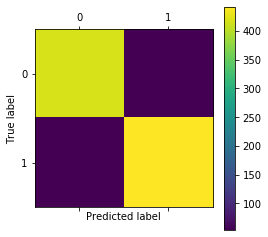

[[0.43195876 0.0556701 ]
 [0.05670103 0.4556701 ]]

Confusion Matrix(normalised)


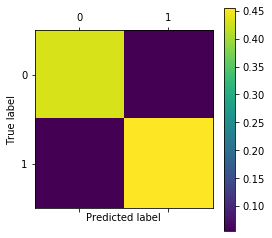

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88       473
         1.0       0.89      0.89      0.89       497

    accuracy                           0.89       970
   macro avg       0.89      0.89      0.89       970
weighted avg       0.89      0.89      0.89       970

Accuracy achieved: 0.8876288659793814 ♡♡♡


In [88]:
# op_lin_results = optimised_lin.predict(te_X)
op_lin_results = lin_SVC.predict(te_A)

# cm = confusion_matrix(te_Y, op_lin_results)
cm = confusion_matrix(te_B, op_lin_results)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix')
plt.show()

# cm2 = confusion_matrix(te_Y, op_lin_results, normalize='all')
cm2 = confusion_matrix(te_B, op_lin_results, normalize='all')
print(cm2)
plt.matshow(cm2)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix(normalised)')
plt.show()

print(classification_report(te_B, op_lin_results))
print('Accuracy achieved:', accuracy_score(te_B, op_lin_results), '\u2661''\u2661''\u2661')

[[422  51]
 [ 54 443]]

Confusion Matrix


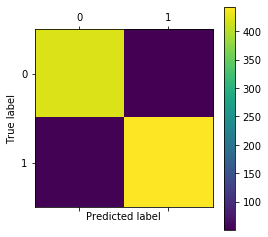

[[0.43505155 0.05257732]
 [0.0556701  0.45670103]]

Confusion Matrix(normalised)


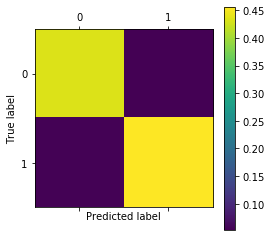

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       473
         1.0       0.90      0.89      0.89       497

    accuracy                           0.89       970
   macro avg       0.89      0.89      0.89       970
weighted avg       0.89      0.89      0.89       970

Accuracy achieved: 0.8917525773195877 ♡♡♡


In [87]:
# optimised_rbf = svm.SVC(kernel = 'rbf', gamma = rbfSVC_param['gamma'], C = rbfSVC_param['C'])
# optimised_rbf.fit(tr_X, tr_Y)
# op_rbf_results = optimised_rbf.predict(te_X)
op_rbf_results = rbf_SVC.predict(te_A)

# cm = confusion_matrix(te_Y, op_rbf_results)
cm = confusion_matrix(te_B, op_rbf_results)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix')
plt.show()

# cm2 = confusion_matrix(te_Y, op_rbf_results, normalize='all')
cm2 = confusion_matrix(te_B, op_rbf_results, normalize='all')
print(cm2)
plt.matshow(cm2)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix(normalised)')
plt.show()

print(classification_report(te_B, op_rbf_results))
print('Accuracy achieved:', accuracy_score(te_B, op_rbf_results), '\u2661''\u2661''\u2661')

[[425  48]
 [ 44 453]]

Confusion Matrix


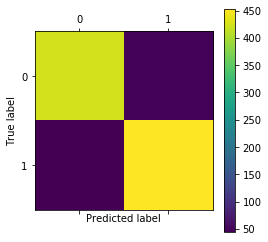

[[0.43814433 0.04948454]
 [0.04536082 0.46701031]]

Confusion Matrix(normalised)


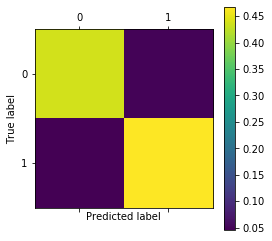

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90       473
         1.0       0.90      0.91      0.91       497

    accuracy                           0.91       970
   macro avg       0.91      0.90      0.91       970
weighted avg       0.91      0.91      0.91       970

Accuracy achieved: 0.9051546391752577 ♡♡♡


In [86]:
# optimised_poly = svm.SVC(kernel = 'poly', degree = polySVC_param['degree'], C = polySVC_param['C'])
# optimised_poly.fit(tr_X, tr_Y)
# op_p_results = optimised_poly.predict(te_X)
op_p_results = poly_SVC.predict(te_A)

# cm = confusion_matrix(te_Y, op_p_results)
cm = confusion_matrix(te_B, op_p_results)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix')
plt.show()

# cm2 = confusion_matrix(te_Y, op_p_results, normalize='all')
cm2 = confusion_matrix(te_B, op_p_results, normalize='all')
print(cm2)
plt.matshow(cm2)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix(normalised)')
plt.show()

print(classification_report(te_B, op_p_results))
print('Accuracy achieved:', accuracy_score(te_B, op_p_results), '\u2661''\u2661''\u2661')

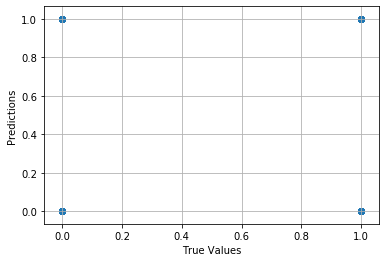

In [41]:
plt.scatter(te_B, op_p_results)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid()
plt.show()

Automatically created module for IPython interactive environment


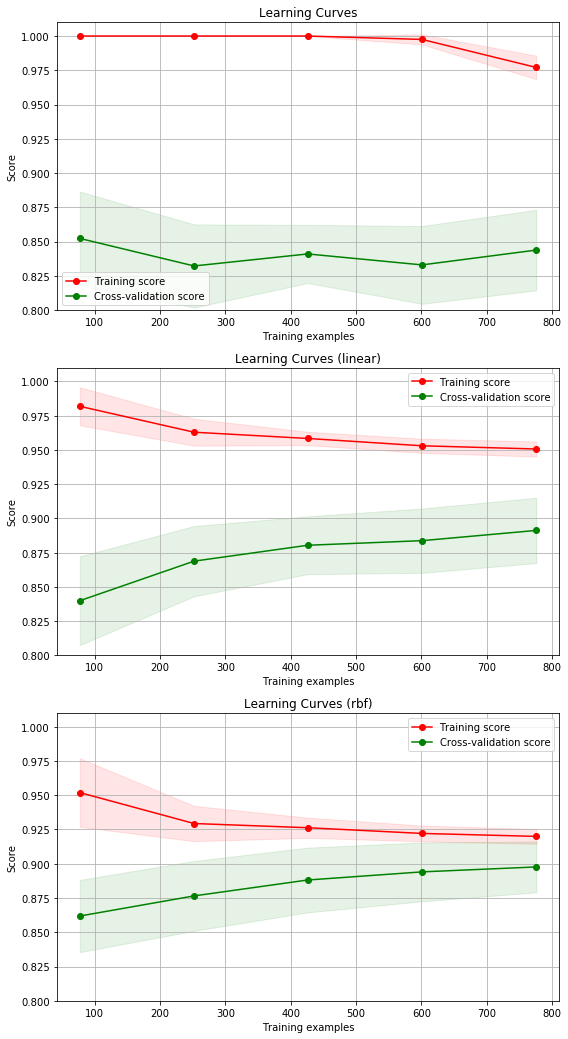

In [105]:
print(__doc__)

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
        axes.set_xlabel("Training examples")
        axes.set_ylabel("Score")

        train_sizes, train_scores, test_scores, fit_times, _ = \
            learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                           train_sizes=train_sizes,
                           return_times=True)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        fit_times_mean = np.mean(fit_times, axis=1)
        fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
        axes.grid()
        axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                             train_scores_mean + train_scores_std, alpha=0.1,
                             color="r")
        axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                             test_scores_mean + test_scores_std, alpha=0.1,
                             color="g")
        axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                     label="Training score")
        axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                     label="Cross-validation score")
        axes.legend(loc="best")

    return plt

plt.figure(figsize=(9,18))

cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)


# estimator = poly_SVC 
# plot_learning_curve(estimator, title, te_X, te_Y, axes=axes, ylim=(0.8, 1.01), cv=cv, n_jobs=-1)
axes = plt.subplot(311)
plot_learning_curve(lin_SVC, title, te_A, te_B, axes=axes, ylim=(0.8, 1.01), cv=cv, n_jobs=-1)
title = r"Learning Curves (linear)"
axes = plt.subplot(312)
plot_learning_curve(rbf_SVC, title, te_A, te_B, axes=axes, ylim=(0.8, 1.01), cv=cv, n_jobs=-1)
title = r"Learning Curves (rbf)"
axes = plt.subplot(313)
plot_learning_curve(poly_SVC, title, te_A, te_B, axes=axes, ylim=(0.8, 1.01), cv=cv, n_jobs=-1)
title = r"Learning Curves (poly)"

plt.show()

In [106]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 55409.35808944702 seconds ---
